In [ ]:
pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt


In [ ]:
# Load pre-trained YOLOv5 model (YOLOv5s = small model)
model = YOLO('yolov5s.pt')


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.




0: 448x640 6 persons, 1 car, 1 handbag, 4 suitcases, 399.9ms
Speed: 5.1ms preprocess, 399.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


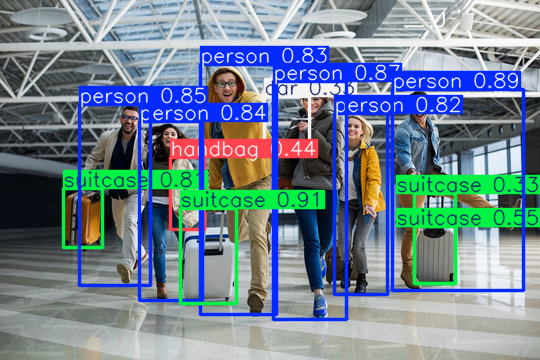

In [ ]:
# Load image using OpenCV
image_path = '/content/airport.jpg'
image = cv2.imread(image_path)

# Run object detection
results = model(image)

# Visualize the result
results[0].show()



0: 448x640 3 persons, 1 dog, 587.0ms
Speed: 4.4ms preprocess, 587.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


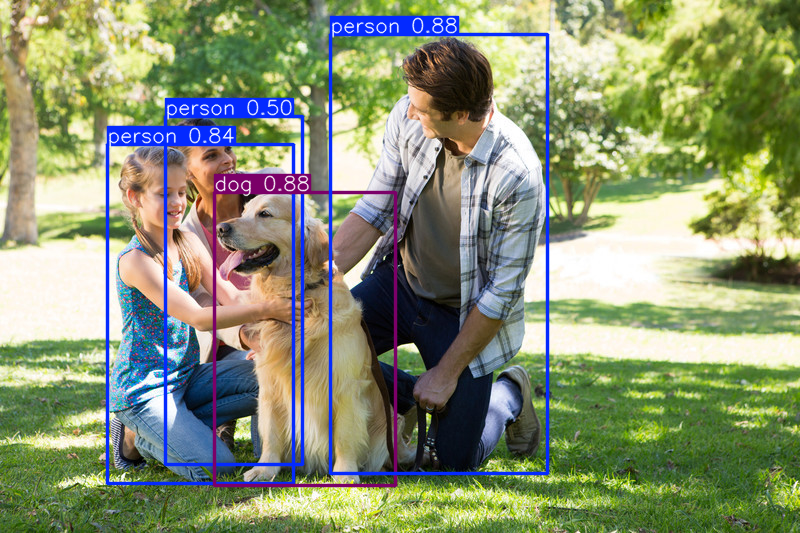

In [ ]:
# Load image using OpenCV
image_path = '/content/dog.jpg'
image = cv2.imread(image_path)

# Run object detection
results = model(image)

# Visualize the result
results[0].show()


In [ ]:
# Accessing detection results
for result in results:
    for box in result.boxes:
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        conf = float(box.conf[0])
        print(f"Detected: {label}, Confidence: {conf:.2f}")


Detected: suitcase, Confidence: 0.91
Detected: person, Confidence: 0.89
Detected: person, Confidence: 0.87
Detected: person, Confidence: 0.85
Detected: person, Confidence: 0.84
Detected: person, Confidence: 0.83
Detected: person, Confidence: 0.82
Detected: suitcase, Confidence: 0.81
Detected: suitcase, Confidence: 0.55
Detected: handbag, Confidence: 0.44
Detected: car, Confidence: 0.33
Detected: suitcase, Confidence: 0.33


In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()

    cv2.imshow('YOLOv5 Real-Time Detection', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
